<a href="https://colab.research.google.com/github/Monishraj50/Blood_Noblood/blob/master/Blood_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Extracting the Blood-noblood file
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/Blood_noblood.zip','r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [38]:
import os
import numpy as np
import shutil
import random
from PIL import Image

# # Defining Train / Val Directories
root_dir = '/content/sample_data/Blood_noblood/'
blood_dir = '/content/sample_data/Blood_noblood/blood'
noblood_dir = '/content/sample_data/Blood_noblood/noblood'
blood_dir_names = os.listdir(blood_dir)
noblood_dir_names = os.listdir(noblood_dir)

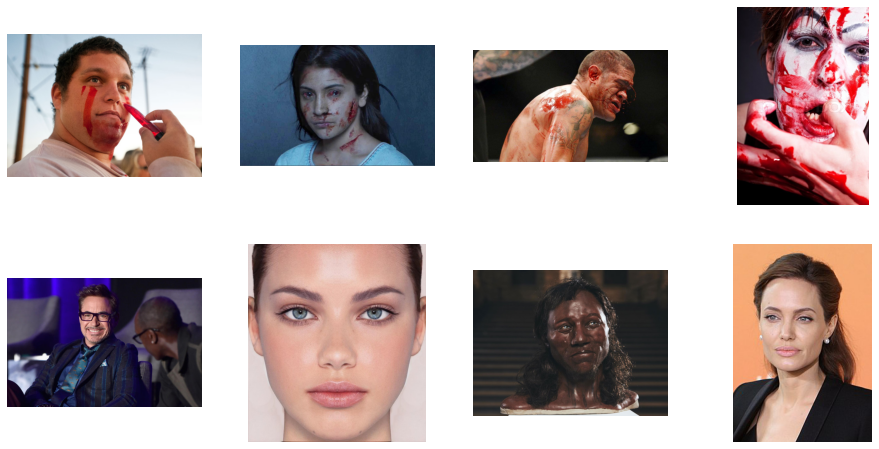

In [39]:
#importing libraries to sample the images
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Parameters for our graph; We will output the 2x4 Configuration 
nrows = 2
ncols = 4
#Index the iteration over images
pic_index = 0

#Set Up the matplotlib fig size to fit it 2x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_blood_pix = [os.path.join(blood_dir, fname) 
                for fname in blood_dir_names[ pic_index-4:pic_index] 
               ]

next_noblood_pix = [os.path.join(noblood_dir, fname) 
                for fname in noblood_dir_names[ pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_blood_pix+next_noblood_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


From the above images:

 First Row corresponds to the faces with blood.

 Second Row corresponds to the faces with noblood.

In [65]:
#Creating a Function to detect Corrupted Images
def Detect_CorruptedImages(dir,dir_names):
    for name in dir_names:
      if name.endswith('.jpg'):
          try:
            img = Image.open(dir+'/'+name)
            img.verify()
          except (IOError,SyntaxError) as e:
            return print('Corrupted Image: '+name)

#Detecting Corrupted Images in blood Directory
Detect_CorruptedImages(blood_dir,blood_dir_names)

#detecting Corrupted Images in Noblood Directory
Detect_CorruptedImages(noblood_dir,noblood_dir_names)


Corrupted Image: noblood_16.jpg


As we see that one image were correpted from noblood directory

In [49]:
#Removing the correpted image from directory
corrupted_image = noblood_dir+'/noblood_16.jpg'
open(corrupted_image,'w').close()
os.remove(corrupted_image)

In [50]:
#Creating a Train and validation Directories 
os.makedirs(root_dir+'train')
os.makedirs(root_dir+'val')
train_dir = '/content/sample_data/Blood_noblood/train'
val_dir = '/content/sample_data/Blood_noblood/val'

#Creating list of classes
classes_dir = ['blood', 'noblood']

#validatipon ratio to split the data
val_ratio = 0.30

for cls in classes_dir:
    os.makedirs(train_dir +'/train_' + cls)
    os.makedirs(val_dir +'/val_' + cls)


    # Creating partitions of the data after shuffeling
    # Folder to copy images from
    src = root_dir + cls 

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                    [int(len(allFileNames)* (1 - val_ratio)) 
                                     ])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

    print(cls+':')
    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))


    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'train/train_' + cls+'/')

    for name in val_FileNames:
        shutil.copy(name, root_dir +'val/val_' + cls+'/')

blood:
Total images:  401
Training:  280
Validation:  121
noblood:
Total images:  428
Training:  299
Validation:  129


In [51]:
# Making a list of Images names according to the classes with  train and val sets 
train_blood_dir_names=os.listdir(train_dir+'/train_blood')
train_noblood_dir_names=os.listdir(train_dir+'/train_noblood')
val_blood_dir_names=os.listdir(val_dir+'/val_blood')
val_noblood_dir_names=os.listdir(val_dir+'/val_noblood')
print(train_blood_dir_names[:10])
print('\n')
print(train_noblood_dir_names[:10])


['blood_181.jpg', 'blood_182.jpg', 'blood_27.jpg', 'blood_377.jpg', 'blood_110.jpg', 'blood_138.jpg', 'blood_206.jpg', 'blood_392.jpg', 'blood_272.jpg', 'blood_69.jpg']


['noblood_164.jpg', 'noblood_363.jpg', 'noblood_339.jpg', 'noblood_107.jpg', 'noblood_434.jpg', 'noblood_168.jpg', 'noblood_259.jpg', 'noblood_93.jpg', 'noblood_117.jpg', 'noblood_302.jpg']


['blood_9.jpg', 'blood_364.jpg', 'blood_25.jpg', 'blood_112.jpg', 'blood_246.jpg', 'blood_340.jpg', 'blood_396.jpg', 'blood_204.jpg', 'blood_153.jpg', 'blood_303.jpg']


['noblood_427.jpg', 'noblood_161.jpg', 'noblood_248.jpg', 'noblood_208.jpg', 'noblood_228.jpg', 'noblood_430.jpg', 'noblood_150.jpg', 'noblood_145.jpg', 'noblood_432.jpg', 'noblood_118.jpg']




In [52]:
#Importing the tensorflow and keras libraries 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [53]:
# Using the pretrained InceptionV3 Model
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False,
                                weights ='imagenet')

In [54]:
# Not training the upper layers
for layer in pre_trained_model.layers:
  layer.trainable=False

In [55]:
#Summary of the Model
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [56]:

last_layer = pre_trained_model.get_layer('mixed9')
last_output = last_layer.output

In [57]:
from tensorflow.keras.optimizers import RMSprop
X = layers.Flatten()(last_output)
X = layers.Dense(1024,activation='relu')(X)
X = layers.Dropout(0.2)(X)
X = layers.Dense(1,activation='sigmoid')(X)
model = Model(pre_trained_model.input,X)
model.compile(optimizer=RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['acc'])

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [59]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 579 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [60]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 50,
            validation_steps=4,
            verbose=1)

Epoch 1/50
29/29 [==============================] - 20s 676ms/step - loss: 1.7980 - acc: 0.7288 - val_loss: 0.2189 - val_acc: 0.9250
Epoch 2/50
29/29 [==============================] - 18s 631ms/step - loss: 0.5339 - acc: 0.8256 - val_loss: 0.1819 - val_acc: 0.9250
Epoch 3/50
29/29 [==============================] - 18s 618ms/step - loss: 0.5149 - acc: 0.8446 - val_loss: 0.1598 - val_acc: 0.9375
Epoch 4/50
29/29 [==============================] - 18s 613ms/step - loss: 0.3610 - acc: 0.8756 - val_loss: 0.2968 - val_acc: 0.8500
Epoch 5/50
29/29 [==============================] - 18s 604ms/step - loss: 0.4323 - acc: 0.8670 - val_loss: 0.2774 - val_acc: 0.9375
Epoch 6/50
29/29 [==============================] - 18s 623ms/step - loss: 0.3888 - acc: 0.8895 - val_loss: 0.2740 - val_acc: 0.9000
Epoch 7/50
29/29 [==============================] - 17s 602ms/step - loss: 0.2890 - acc: 0.8808 - val_loss: 0.8328 - val_acc: 0.7750
Epoch 8/50
29/29 [==============================] - 17s 601ms/step - 

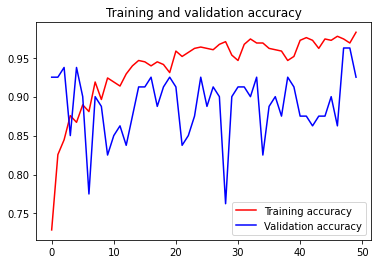

<Figure size 432x288 with 0 Axes>

In [67]:
# Ploting the accuracy Curve
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()